<a href="https://colab.research.google.com/github/sergioGarcia91/ML_and_EDA/blob/main/01a_Sismos_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos - Dataset: Sismos_V01.csv


> *Ser tan rápidos como el más lento, \
> y ser tan lentos como el más rápido.*

**Autor:** Sergio Andrés García Arias  
**Versión 01:** Diciembre 2023

# Introducción

En este Notebook, exploraremos de manera generalizada cómo utilizar la biblioteca `Pandas` en Google Colab para manipular datos, extrayendo información esencial para nuestros proyectos.

El **Análisis Exploratorio de Datos** o *Exploratory Data Analysis* (EDA) es una de las primeras tareas a realizar al abordar proyectos que requieren el procesamiento de información, ya sea para la generación de modelos o la toma de decisiones.

> *El objetivo principal del EDA es examinar los datos en bruto para comprender mejor su estructura y características, desentrañando patrones o relaciones ocultas.*

Esto implica:

- Evaluar la suficiencia de los datos.
- Determinar si los datos son adecuados para cumplir con los objetivos planteados.
- Identificar posibles irregularidades, valores atípicos o faltantes, crucial para garantizar la calidad de los datos y de los resultados.
- Generar nuevas perspectivas y cuestionamientos.
- Etcétera ...

---
**Observación:** Durante o al finalizar este análisis, es común que surjan preguntas adicionales, distintas de las originalmente planteadas. Dependiendo de los intereses del proyecto, estas nuevas preguntas pueden ser exploradas y resueltas, enriqueciendo aún más la comprensión del conjunto de datos.


# Inicio

# Carga de Datos

Existen varias formas de cargar/importar datos a Colab para ser analizados. De momento solo consideraremos dos métodos, el primero implica utilizar la pestaña de Archivo en la barra izquierda, la cual tiene la forma de una carpeta. Luego, selecciona el primer icono para cargar un archivo.

> **Importante:** Cuando cargues un archivo manualmente mediante la opción "Cargar Archivos", se debe atención al estado de carga que aparecerá. Se debe esperar a que la se complete al 100% antes de proceder.

Si no esperas a que la carga concluya, es posible que el archivo se lea de manera incompleta y desordenada, lo cual podría afectar la calidad de los datos y el análisis posterior.




<center><img src='https://drive.google.com/uc?id=1ZBBC5GyOXq2H6GGX9S4sz3nfpm0c1DuY' width=1000 /></center>


La segunda opción es conectarse con Google Drive. Esto se puede lograr haciendo clic en el tercer icono con la forma de una carpeta de Drive o mediante la siguiente celda de código:

```python
from google.colab import drive
drive.mount('/content/drive')
```

Se deben dar permisos para la vinculación con el Drive. Si se ha realizado correctamente la vinculación con Google Drive, debería aparecer el siguiente mensaje en la salida de la celda:

```python
Mounted at /content/drive
```

In [ ]:
# Si se va conectar con su Drive
# ejecutar esta celda
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Si se ha vinculado el entorno de Google Colab con Google Drive aparecerá una nueva carpeta llamada `drive` en la Pestaña de Archivos. Esta carpeta se puede desplegar y navegar por todas las subcarpetas de su Drive.

Para acceder a un archivo específico, sigue estos pasos:

1. Navega a través de las carpetas hasta encontrar la ruta donde se encuentra el archivo deseado.
2. Una vez encontrado el archivo, haz clic en los tres puntos que aparecen al poner el cursor sobre el nombre del archivo.
3. Selecciona la opción `Copiar la ruta de acceso`.

<center><img src='https://drive.google.com/uc?id=1ZK0OSt_alla9puCvH6SMyi3u9cI1ZVQv' width=1000 /></center>




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La ruta copiada anteriormente puede ser pegada directamente en una celda de código como un `string`. Para facilitar la organización y flexibilidad, se recomienda guardar la ruta de la carpeta y el nombre del archivo por separado.

```python
carpeta = '/content/drive/...'
nombre_archivo = 'mi_archivo.csv'

ruta_completa = carpeta + '/' + nombre_archivo
```



In [ ]:
path = '/content/drive/MyDrive/UIS/ASIGNATURAS/Notebooks_Python/ML_and_EDA/Datasets/'
nombreArchivo = 'Sismos_V01.csv'
archivoDrive = path + nombreArchivo

Si se a cargado manualmente el archivo utilizando la opción "Subir Archivo" en la pestaña de Archivo, solo se debe especificar el nombre del archivo en una variable para poder leerlo posteriormente.



```python
nombre_archivo_manual = 'mi_archivo_manual.csv'
```


In [ ]:
archivoManual = 'Sismos_V01.csv'

Con los nombres de los dos archivos almacenados en variables, procederemos a cargarlos como DataFrames.

In [ ]:
archivoDrive

'/content/drive/MyDrive/UIS/ASIGNATURAS/Notebooks_Python/ML_and_EDA/Datasets/Sismos_V01.csv'

In [ ]:
# Procedemos a usar pandas para crear los 2 DataFrames
df_Drive = pd.read_csv(archivoDrive,
                       delimiter=';', # el archivo esta separado por punto y coma ';'
                       decimal=',') # el decimal es la como ','

# Para conocer cuál es el delimitador/separador del archivo
# se puede hacer abriendo el archivo .csv con un block de notas
# y de este modo verificar por defecto están los valores de:
# delimiter=','    decimal='.'

df_Drive.head() # ver solo las primeras 5 filas

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
1,15/09/2019 2:20,MLr_3_Duplicada,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
2,8/08/2020 19:17,MLr_3_Blanco,5.713,-73.861,1023982.6,1123503.864,123.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual


In [ ]:
archivoManual

'Sismos_V01.csv'

In [ ]:
df_Manual = pd.read_csv(archivoManual,
                 delimiter=';',
                 decimal=',')
# Debe ser la misma salida que si se cargara por el Drive
df_Manual.head()

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
1,15/09/2019 2:20,MLr_3_Duplicada,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
2,8/08/2020 19:17,MLr_3_Blanco,5.713,-73.861,1023982.6,1123503.864,123.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual


Para obtener información detallada sobre la función `pandas.read_csv()`, te recomiendo explorar la [documentación oficial de Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

---
A partir de este punto, usaremos exclusivamente el DataFrame generado a partir del archivo cargado manualmente: `df_Manual`.





## Exploración inicial

Haciendo uso de las funciones `head()`, `info()`, y `describe()` de `Pandas` se puede obtener una visión general rápida de tus datos.

```python
df.head()
df.info()
df.describe()
```


In [ ]:
df_Manual.head(10) # Ver las 10 primeras filas

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.30,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
1,15/09/2019 2:20,MLr_3_Duplicada,5.711,-73.881,1021767.30,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
2,8/08/2020 19:17,MLr_3_Blanco,5.713,-73.861,1023982.60,1123503.864,123.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.60,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.90,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual
5,14/09/2018 4:07,MLr,5.717,-73.817,1028856.40,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,Santander,Albania,manual
6,19/03/2018 6:44,MLr,5.719,-73.864,1023650.10,1124167.257,112.70,1.5,12.0,0.4,130.0,1.768,1.768,3.5,Santander,Albania,manual
7,23/01/2019 2:01,M,5.725,-73.803,1030406.70,1124833.644,118.18,1.8,21.0,0.4,122.0,1.131,1.131,2.1,Santander,Albania,manual
8,26/01/2019 8:03,M_MLr,5.735,-73.861,1023981.71,1125936.758,114.00,-1.5,15.0,0.5,115.0,1.838,1.838,4.2,Santander,Albania,manual
9,26/01/2019 8:03,M_MLr,5.735,-73.861,1023981.70,1125936.759,114.00,1.5,15.0,0.5,115.0,1.838,1.838,4.2,Santander,Albania,manual


Utilizando la función `head()`, se muestran de manera predeterminada las primeras 5 filas del DataFrame. Al ingresar un número dentro de los paréntesis `()`, se visualizará la cantidad de filas indicadas. Por otro lado, si se desea observar las últimas filas, se utiliza la función `tail()`.

---
Cabe destacar que los índices o números de fila comienzan desde 0.

In [ ]:
df_Manual.tail(3) # Ver las 3 ultimas filas

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
144521,4/03/2011 8:40,Ml,7.650,-73.223,1094285.7,1337804.645,136.7,1.4,4.0,0.3,173.0,4.6,13.0,9.7,SANTANDER,EL_PLAYON,Revisado
144522,18/02/2004 7:56,Ml,7.656,-73.223,1094284.4,1338468.281,140.4,2.4,6.0,0.4,187.0,6.4,13.1,15.4,SANTANDER,EL_PLAYON,Revisado
144523,15/07/2010 9:51,Ml,7.659,-73.233,1093180.3,1338797.918,148.0,1.5,4.0,0.1,139.0,5.2,6.6,5.4,SANTANDER,EL_PLAYON,Revisado


El objetivo es asegurarnos de que todos los valores estén organizados de la manera convencional de filas y columnas.

In [ ]:
df_Manual.info() # Obtener "información" del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144524 entries, 0 to 144523
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FECHA - HORA UTC        144524 non-null  object 
 1   TIPO MAGNITUD           144524 non-null  object 
 2   LATITUD (°)             144524 non-null  float64
 3   LONGITUD (°)            144524 non-null  float64
 4   X_3116                  144524 non-null  float64
 5   Y_3116                  144524 non-null  float64
 6   PROF. (Km)              144524 non-null  float64
 7   MAGNITUD                144523 non-null  float64
 8   FASES                   144523 non-null  float64
 9   RMS (Seg)               144523 non-null  float64
 10  GAP (°)                 144523 non-null  float64
 11  ERROR LATITUD (Km)      144523 non-null  float64
 12  ERROR LONGITUD (Km)     144523 non-null  float64
 13  ERROR PROFUNDIDAD (Km)  144523 non-null  float64
 14  DEPARTAMENTO        

La función `info()` brinda un resumen del DataFrame. Incluye información sobre:

- Tipo de datos de las columnas
- Cantidad de valores no nulos por columna
- El uso de memoria del DataFrame
- Cantidad total de filas presentes en el DataFrame
- Enumera todas las columnas del DataFrame
- Muestra la cantidad de valores que no son nulos en cada columna
- Muestra el tipo de datos de cada columna (ejemplo int, float, object)

Esta funcion permite identificar posibles problemas o áreas de interés en tus datos, como lo son la ausencia de datos y que las columnas tengan los tipos de datos correctos para realizar operaciones adecuadas.

In [ ]:
df_Manual.describe().round(2) # Descripción estadística del DataFrame
# df_Manual.describe() lo podemos considerar como un nuevo DataFrame
# al cual se le pueden aplicar métodos ...
# Aplicamos .round() para que los valores del DataFrame resultante
# sean redondeados a solo 2 decimales

,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km)
count,144524.00,144524.00,144524.00,144524.00,144524.00,144523.00,144523.00,144523.00,144523.00,144523.00,144523.00,144523.00
mean,6.80,-73.21,1096076.76,1244246.32,134.15,2.04,10.93,0.42,163.62,4.70,7.16,7.61
std,0.33,0.25,27648.91,36801.52,32.30,0.70,10.02,0.19,61.03,3.82,6.91,6.09
min,5.71,-74.91,908256.14,1123061.27,-2.00,-1.50,0.00,0.00,0.00,0.00,0.00,0.00
25%,6.77,-73.19,1097986.73,1240307.81,138.00,1.50,5.00,0.30,129.00,2.60,2.90,4.50
50%,6.80,-73.15,1102981.40,1244023.66,144.30,1.90,7.00,0.40,150.00,3.90,5.00,6.50
75%,6.83,-73.09,1108839.40,1247127.84,148.50,2.40,12.00,0.50,199.00,5.80,9.30,9.10
max,10.20,-72.40,1185091.90,1619192.65,436.50,10.00,116.00,9.40,347.00,99.90,99.90,99.90


La función `describe()` se utiliza para generar la estadística descriptiva del DataFrame. O lo que corresponde con un resumen estadístico que puede ser útil para comprender la distribución y las tendencias de los datos numéricos en tu conjunto de datos de manera preliminar.

Algunos de los estadísticos son:

- **count:** Número de elementos no nulos.
- **mean:** Media aritmética.
- **std:** Desviación estándar.
- **min:** Valor mínimo.
- **25%:** Primer cuartil (percentil 25).
- **50%:** Mediana o segundo cuartil (percentil 50).
- **75%:** Tercer cuartil (percentil 75).
- **max:** Valor máximo.


In [ ]:
# Antes de proseguir vamos a guardar cuantas filas tiene el DataFrame original
filas_df_Original = len(df_Manual)
filas_df_Original

144524

## Datos faltantes

Sí, has señalado dos observaciones importantes al utilizar `head(10)` y `info()` en tu DataFrame:

1. Cantidad de filas totales no concuerdan entre las columnas

2. La presencia de una fila con valores NaN indica que hay datos faltantes en tu conjunto de datos.

Para ello se considerar:

- Utilizar la función `isnull()` o `isna()` para identificar las ubicaciones de los valores nulos en tu DataFrame.
- Utilizar funciones como `dropna()` o `fillna()` para manejar los valores nulos, eliminándolos o llenándolos con valores apropiados.
- Verificar si la cantidad de filas totales se ajusta a tus expectativas y si hay valores inesperados o datos inconsistentes.


Ejmeplo:
```python
df.isnull().sum()
df.dropna()  # O usa fillna() para imputar valores
```



In [ ]:
df_Manual.isnull().sum()
# .isnull() nos regresa un DataFrame con la misma estructura original
# pero completamente llena con valores Boleanos
# True para si el dato es nulo o faltante
# False si existe algun tipo de dato en la celda
# con el .sum() buscamos a que se cuenten cuantos datos faltan por columna
# Recordar que el True = 1 y False = 0

FECHA - HORA UTC          0
TIPO MAGNITUD             0
LATITUD (°)               0
LONGITUD (°)              0
X_3116                    0
Y_3116                    0
PROF. (Km)                0
MAGNITUD                  1
FASES                     1
RMS (Seg)                 1
GAP (°)                   1
ERROR LATITUD (Km)        1
ERROR LONGITUD (Km)       1
ERROR PROFUNDIDAD (Km)    1
DEPARTAMENTO              1
MUNICIPIO                 1
ESTADO                    1
dtype: int64

In [ ]:
df_Manual.head()

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
1,15/09/2019 2:20,MLr_3_Duplicada,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
2,8/08/2020 19:17,MLr_3_Blanco,5.713,-73.861,1023982.6,1123503.864,123.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual


In [ ]:
df_Manual.dropna() # Eliminar las filas con NaN

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
1,15/09/2019 2:20,MLr_3_Duplicada,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual
5,14/09/2018 4:07,MLr,5.717,-73.817,1028856.4,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,Santander,Albania,manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144519,4/11/2011 9:06,Ml,7.646,-73.209,1095831.5,1337365.312,135.40,1.4,7.0,0.4,132.0,5.000,5.300,7.2,SANTANDER,EL_PLAYON,Revisado
144520,22/12/2009 2:54,Ml,7.649,-73.247,1091637.6,1337688.855,127.30,2.3,8.0,0.2,116.0,2.300,4.900,4.2,SANTANDER,EL_PLAYON,Revisado
144521,4/03/2011 8:40,Ml,7.650,-73.223,1094285.7,1337804.645,136.70,1.4,4.0,0.3,173.0,4.600,13.000,9.7,SANTANDER,EL_PLAYON,Revisado
144522,18/02/2004 7:56,Ml,7.656,-73.223,1094284.4,1338468.281,140.40,2.4,6.0,0.4,187.0,6.400,13.100,15.4,SANTANDER,EL_PLAYON,Revisado


In [ ]:
df_Manual.head() # si se vuelve a llamar el DataFrame no se ve que se eliminara la final
# se debe "guardar" o sobre escribir la variable

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
1,15/09/2019 2:20,MLr_3_Duplicada,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
2,8/08/2020 19:17,MLr_3_Blanco,5.713,-73.861,1023982.6,1123503.864,123.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual


In [ ]:
# Vamos a crear una copia para no afectar los datos originales
# y a esta copia aplicar el .dropna()
df_copy = df_Manual.copy().dropna()
df_copy.head()
# La fila 2 ya no está

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
1,15/09/2019 2:20,MLr_3_Duplicada,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual
5,14/09/2018 4:07,MLr,5.717,-73.817,1028856.4,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,Santander,Albania,manual


## Datos duplicados

Si se observa con detalle, la fila `1` tiene en una de sus celdas `MLr_3_Duplicada`. Esto es para evidenciar que ese es un dato duplicado, si se observan las demás celdas concuerda con los valores de la fila `0`.


La función `drop_duplicates` se utiliza para eliminar las filas duplicadas de un DataFrame. En siguiente ejemplo, `drop_duplicates` eliminará las filas duplicadas del DataFrame basándose en todas las columnas.

```python
# Eliminar filas duplicadas basándose en todas las columnas
df_sin_duplicados = df.drop_duplicates()

```

Para personalizar las columnas a considerar, se utiliza el parámetro `subset`.

```python
df_sin_duplicados = df.drop_duplicates(subset=['Columna 1', 'Columna F'])
```



In [ ]:
# Vamos a eliminar esa fila 1
df_copy = df_copy.drop_duplicates()
df_copy.head()
# no se eliminó porque el valor en la columna TIPO MAGNITUD de la
# fila 1 y fila 0 son diferentes

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
1,15/09/2019 2:20,MLr_3_Duplicada,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual
5,14/09/2018 4:07,MLr,5.717,-73.817,1028856.4,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,Santander,Albania,manual


In [ ]:
df_copy.columns # Para ver el nombre de las Columnas

Index(['FECHA - HORA UTC', 'TIPO MAGNITUD', 'LATITUD (°)', 'LONGITUD (°)',
       'X_3116', 'Y_3116', 'PROF. (Km)', 'MAGNITUD', 'FASES', 'RMS (Seg)',
       'GAP (°)', 'ERROR LATITUD (Km)', 'ERROR LONGITUD (Km)',
       'ERROR PROFUNDIDAD (Km)', 'DEPARTAMENTO', 'MUNICIPIO', 'ESTADO'],
      dtype='object')

In [ ]:
# Se van a considerar de momento solo la Fecha-hora del evento
# junto con su localización, bajo la lógica de
# que no pueden ocurrir 2 eventos
# a la vez en el mismo lugar
df_copy = df_copy.drop_duplicates(subset=['FECHA - HORA UTC', 'LATITUD (°)', 'LONGITUD (°)'])
df_copy.head()

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual
5,14/09/2018 4:07,MLr,5.717,-73.817,1028856.4,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,Santander,Albania,manual
6,19/03/2018 6:44,MLr,5.719,-73.864,1023650.1,1124167.257,112.70,1.5,12.0,0.4,130.0,1.768,1.768,3.5,Santander,Albania,manual


Después de haber eliminado los datos faltantes y duplicados, es recomendable revisar las características del DataFrame antes de continuar con el análisis.

In [ ]:
filas_df_SinFaltantes_SinDuplicados = len(df_copy)

print('Cantidad datos DataFrame original: ', filas_df_Original)
print('Cantidad datos DataFrame ajustado: ', filas_df_SinFaltantes_SinDuplicados)
print('Diferencia: ', filas_df_Original-filas_df_SinFaltantes_SinDuplicados)

Cantidad datos DataFrame original:  144524
Cantidad datos DataFrame ajustado:  141391
Diferencia:  3133


# Visualización de datos

Algunas de las visualizaciones más útiles en el EDA son:

1. **Histogramas:**
   - Proporcionan una representación visual de la distribución de un conjunto de datos.
   - Ayudan a identificar la forma de la distribución, como si es simétrica, sesgada a la derecha o sesgada a la izquierda.
   - Útiles para detectar la presencia de valores atípicos (no siempre).

2. **Gradicos de dispersión:**
   - Muestran la relación entre dos variables mediante puntos en un plano cartesiano.
   - Permiten identificar patrones, tendencias y posibles correlaciones entre las variables.
   - Útiles para entender la dispersión de los datos y evaluar la fuerza y dirección de la relación.

3. **Gráficos de caja (Boxplots):**
   - Representan la distribución estadística de un conjunto de datos mediante cuartiles.
   - Muestran la mediana, el rango intercuartil (IQR) y pueden identificar valores atípicos.
   - Útiles para comparar la variabilidad entre diferentes grupos de datos.

---
Antes de iniciar un EDA es fundamental tener una comprensión clara del objetivo o problema que se pretende abordar. Hasta el momento, no se ha definido el problema o objetivo específico de interés, pero por razones prácticas, se optará por omitir o simplificar este aspecto del estudio.

A continuación, nos enfocaremos en analizar la magnitud de los eventos sísmicos y su profundidad en el eje de coordenadas X.

## Histograma

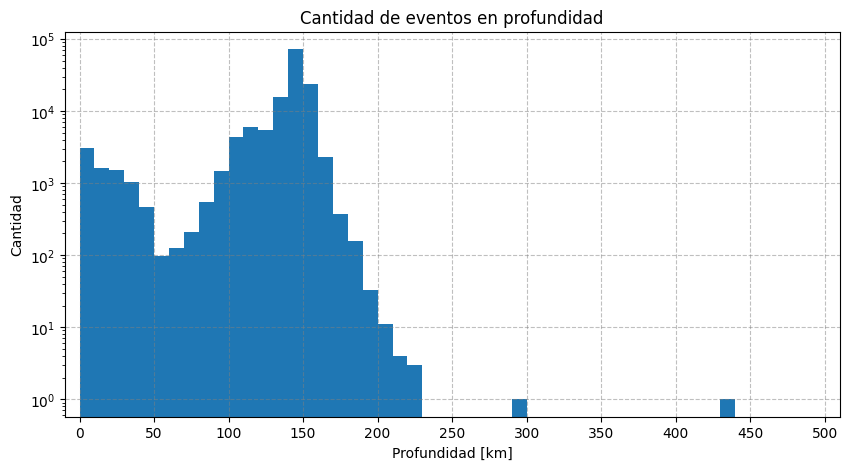

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df_copy['PROF. (Km)'],
         bins=np.arange(0, 500, 10)) # especificar un ancho de las barras o bin de cada 10 km
plt.xlabel('Profundidad [km]')
plt.yscale('log') # Para que el eje Y este en escala logarítmica y ver más claro los contrastes
plt.ylabel('Cantidad')
plt.xticks(np.arange(0, 510, 50))
plt.xlim(-10, 510)
plt.grid(color='grey', ls='--', alpha=0.5)
plt.title('Cantidad de eventos en profundidad')
plt.show()

## Gradicos de dispersión

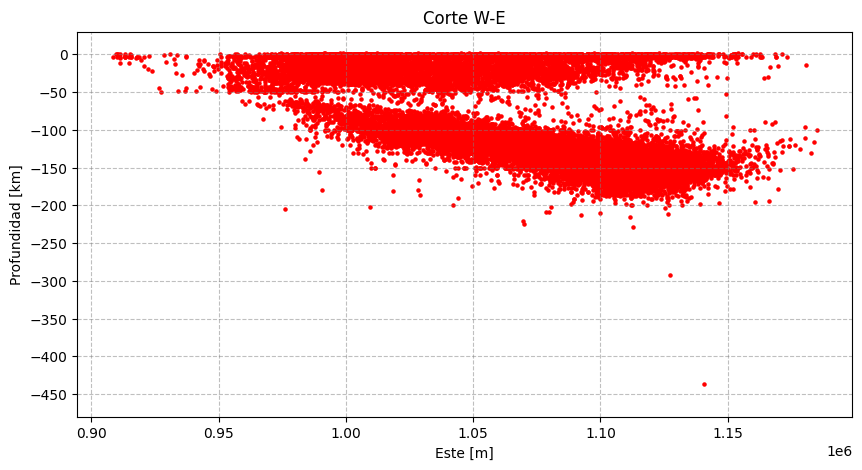

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df_copy['X_3116'],
            -1*df_copy['PROF. (Km)'],
            s= 5,
            c='r')
# Se multiplica por -1 para simplificar que es en profundidad
# también se puede hacer un flipa al eje
plt.xlabel('Este [m]')
plt.ylabel('Profundidad [km]')
plt.yticks(np.arange(0, -460, -50))
plt.ylim(-480, 30)
plt.grid(color='grey', ls='--', alpha=0.5)
plt.title('Corte W-E')
plt.show()

## Boxplot

In [ ]:
df_copy.columns

Index(['FECHA - HORA UTC', 'TIPO MAGNITUD', 'LATITUD (°)', 'LONGITUD (°)',
       'X_3116', 'Y_3116', 'PROF. (Km)', 'MAGNITUD', 'FASES', 'RMS (Seg)',
       'GAP (°)', 'ERROR LATITUD (Km)', 'ERROR LONGITUD (Km)',
       'ERROR PROFUNDIDAD (Km)', 'DEPARTAMENTO', 'MUNICIPIO', 'ESTADO'],
      dtype='object')

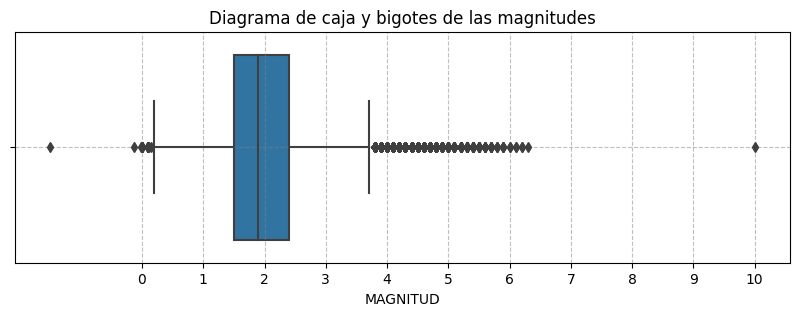

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_copy['MAGNITUD'])
plt.xticks(np.arange(0, 11, 1))
plt.grid(color='grey', ls='--', alpha=0.5)
plt.title('Diagrama de caja y bigotes de las magnitudes')
plt.show()

---
En este punto, es probable que hayas notado lo siguiente:

1. En cuanto a la profundidad de los eventos sísmicos en el catálogo, se observa la presencia de dos modas en el histograma, siendo el límite aproximadamente los 50 km de profundidad. Algunos eventos parecen estar alejados del histograma y corresponden a sismos más profundos, aparentemente solo son dos.

2. En la representación espacial del corte W-E, se aprecia claramente esta división en dos posibles grupos, con el límite en aproximadamente 50 km de profundidad.

3. Los valores atípicos de las magnitudes en el boxplot son representados como puntos fuera de los bigotes, recordar que esta identificación se basa en un criterio estadístico. Estos valores atípicos sugieren la presencia de magnitudes que podrían ser menores a 0 y mayores a 8.

---
Algunas de estas conclusiones posiblemente las habrá identificado al utilizar la función `describe()`.


In [ ]:
df_copy['DEPARTAMENTO'].unique() # Conocer los valores unicos de la columna DEPARTAMENTO

array([' Santander', ' Boyacá', ' Antioquia', ' Magdalena', ' Bolívar',
       ' Norte de Santander', ' Cesar', ' Sucre', 'SANTANDER'],
      dtype=object)

In [ ]:
# Bucle para saber cuantos eventos estan por departamento
for departamento in df_copy['DEPARTAMENTO'].unique():
  filtro_departamentos =  df_copy['DEPARTAMENTO'] == departamento
  totalEventosDepartamento = sum(filtro_departamentos)
  print(f'{departamento}: {totalEventosDepartamento} eventos')

 Santander: 30848 eventos
 Boyacá: 67 eventos
 Antioquia: 438 eventos
 Magdalena: 108 eventos
 Bolívar: 1398 eventos
 Norte de Santander: 173 eventos
 Cesar: 930 eventos
 Sucre: 2 eventos
SANTANDER: 107427 eventos


In [ ]:
# Pero Pandas ya tiene un metodo para la tarea anterior
df_copy['DEPARTAMENTO'].value_counts()

SANTANDER              107427
 Santander              30848
 Bolívar                 1398
 Cesar                    930
 Antioquia                438
 Norte de Santander       173
 Magdalena                108
 Boyacá                    67
 Sucre                      2
Name: DEPARTAMENTO, dtype: int64

# Análisis de correlación

El calculo de la correlación entre dos variables permite identificar la existencia de alguna `relación` entre ellas. La más utilizada es la correlación `lineal` de Pearson. Es importante destacar que se enfatiza en la palabra `lineal`, ya que esta correlación nos permite determinar si dos variables tienen una relación lineal entre ellas y cuán fuerte es dicha relación. Es posible que los datos tengan una relación, pero no sea lineal, por lo que el uso de la correlación lineal de Pearson podría no ser la más apropiado.

---
- Este resultado no debe confundirse con la pendiente de una recta.
- Existen otros tipos de correlaciones, y Pandas proporciona el método `corr()` para calcular estos valores. Para obtener más información, puedes consultar el [repositorio](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

In [ ]:
# Por defecto, .corr() calcula la Correlación lineal de Pearson
# El resultado será una matriz o DataFrame nuevo donde cada celda
# contiene el valor obtenido del cálculo de la correlación
matrizCorrelacionPearson = df_copy.corr()
matrizCorrelacionPearson

<ipython-input-30-062b88621453>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrizCorrelacionPearson = df_copy.corr()


,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km)
LATITUD (°),1.000000,0.066152,0.065002,0.999997,-0.197582,-0.068654,0.047800,-0.063137,0.116406,-0.040735,-0.004629,-0.081376
LONGITUD (°),0.066152,1.000000,0.999999,0.067032,0.747537,0.322971,-0.088882,0.078100,0.298303,0.167788,0.263325,0.059932
X_3116,0.065002,0.999999,1.000000,0.065882,0.747943,0.323079,-0.088964,0.078155,0.298249,0.167868,0.263380,0.060014
Y_3116,0.999997,0.067032,0.065882,1.000000,-0.196948,-0.068317,0.047692,-0.063028,0.116753,-0.040537,-0.004318,-0.081258
PROF. (Km),-0.197582,0.747537,0.747943,-0.196948,1.000000,0.308448,-0.050746,0.029960,0.171666,0.119193,0.168519,0.007700
MAGNITUD,-0.068654,0.322971,0.323079,-0.068317,0.308448,1.000000,0.193517,0.433226,0.160788,0.243002,0.312198,0.283932
FASES,0.047800,-0.088882,-0.088964,0.047692,-0.050746,0.193517,1.000000,0.264332,-0.502415,-0.359884,-0.362038,-0.343166
RMS (Seg),-0.063137,0.078100,0.078155,-0.063028,0.029960,0.433226,0.264332,1.000000,-0.036231,0.334992,0.302339,0.386013
GAP (°),0.116406,0.298303,0.298249,0.116753,0.171666,0.160788,-0.502415,-0.036231,1.000000,0.577710,0.498679,0.378090
ERROR LATITUD (Km),-0.040735,0.167788,0.167868,-0.040537,0.119193,0.243002,-0.359884,0.334992,0.577710,1.000000,0.676973,0.719701


In [ ]:
# Redondeo
matrizCorrelacionPearson = np.round(matrizCorrelacionPearson, 2)
matrizCorrelacionPearson
# El cálculo de la correlación lineal de Pearson solo es realizado
# en las columnas con variables de tipo numérico

,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km)
LATITUD (°),1.00,0.07,0.07,1.00,-0.20,-0.07,0.05,-0.06,0.12,-0.04,-0.00,-0.08
LONGITUD (°),0.07,1.00,1.00,0.07,0.75,0.32,-0.09,0.08,0.30,0.17,0.26,0.06
X_3116,0.07,1.00,1.00,0.07,0.75,0.32,-0.09,0.08,0.30,0.17,0.26,0.06
Y_3116,1.00,0.07,0.07,1.00,-0.20,-0.07,0.05,-0.06,0.12,-0.04,-0.00,-0.08
PROF. (Km),-0.20,0.75,0.75,-0.20,1.00,0.31,-0.05,0.03,0.17,0.12,0.17,0.01
MAGNITUD,-0.07,0.32,0.32,-0.07,0.31,1.00,0.19,0.43,0.16,0.24,0.31,0.28
FASES,0.05,-0.09,-0.09,0.05,-0.05,0.19,1.00,0.26,-0.50,-0.36,-0.36,-0.34
RMS (Seg),-0.06,0.08,0.08,-0.06,0.03,0.43,0.26,1.00,-0.04,0.33,0.30,0.39
GAP (°),0.12,0.30,0.30,0.12,0.17,0.16,-0.50,-0.04,1.00,0.58,0.50,0.38
ERROR LATITUD (Km),-0.04,0.17,0.17,-0.04,0.12,0.24,-0.36,0.33,0.58,1.00,0.68,0.72


Para visualizar mejor el resultado obtenido se puede hacer una representación gráfica. Para ello se puede realizar un `heatmap` usando [Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

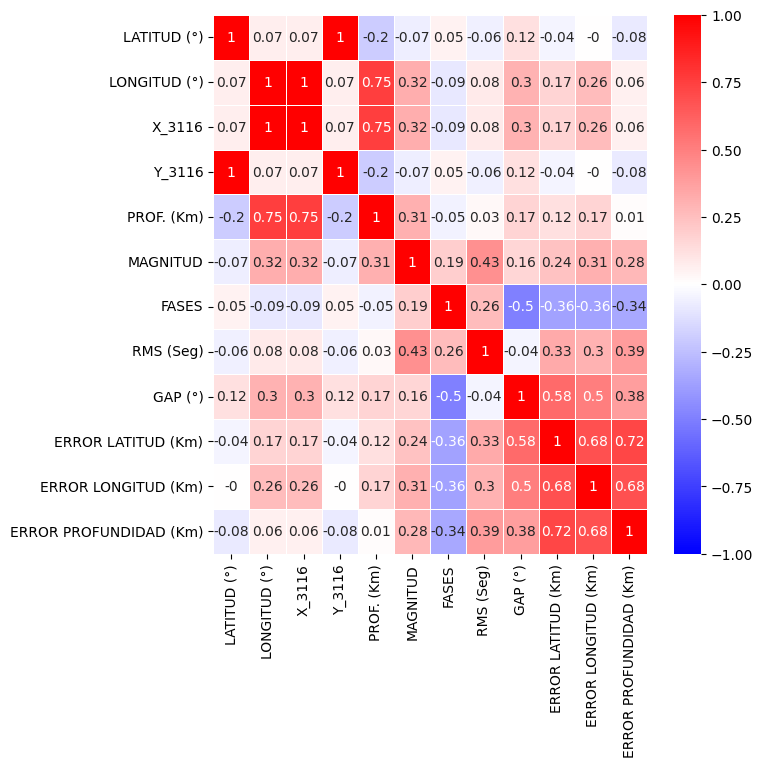

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(matrizCorrelacionPearson,
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='bwr',
            linewidth=.5)
plt.show()

# Análisis de outliers

Anteriormente, se eliminaron datos en el DataFrame original.

- La cantidad de datos en el DataFrame original era de 144524.
- Después de ajustar el DataFrame, la cantidad de datos se redujo a 141391.
- La diferencia entre ambas cantidades es de 3133 datos.

No obstante, se han identificado valores de magnitud en el DataFrame ajustado que aún presentan incoherencias. Por lo tanto, se puede realizar una eliminación adicional de estos datos. Se debe considerar que la decisión de eliminar o retener un dato no puede regirse por un criterio generalizado. Se debe considerar la naturaleza u origen de la información, así como los objetivos específicos del proyecto.

In [ ]:
df_copy

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual
5,14/09/2018 4:07,MLr,5.717,-73.817,1028856.4,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,Santander,Albania,manual
6,19/03/2018 6:44,MLr,5.719,-73.864,1023650.1,1124167.257,112.70,1.5,12.0,0.4,130.0,1.768,1.768,3.5,Santander,Albania,manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144519,4/11/2011 9:06,Ml,7.646,-73.209,1095831.5,1337365.312,135.40,1.4,7.0,0.4,132.0,5.000,5.300,7.2,SANTANDER,EL_PLAYON,Revisado
144520,22/12/2009 2:54,Ml,7.649,-73.247,1091637.6,1337688.855,127.30,2.3,8.0,0.2,116.0,2.300,4.900,4.2,SANTANDER,EL_PLAYON,Revisado
144521,4/03/2011 8:40,Ml,7.650,-73.223,1094285.7,1337804.645,136.70,1.4,4.0,0.3,173.0,4.600,13.000,9.7,SANTANDER,EL_PLAYON,Revisado
144522,18/02/2004 7:56,Ml,7.656,-73.223,1094284.4,1338468.281,140.40,2.4,6.0,0.4,187.0,6.400,13.100,15.4,SANTANDER,EL_PLAYON,Revisado


In [ ]:
df_copy.head(10)

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.30,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.60,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.90,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual
5,14/09/2018 4:07,MLr,5.717,-73.817,1028856.40,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,Santander,Albania,manual
6,19/03/2018 6:44,MLr,5.719,-73.864,1023650.10,1124167.257,112.70,1.5,12.0,0.4,130.0,1.768,1.768,3.5,Santander,Albania,manual
7,23/01/2019 2:01,M,5.725,-73.803,1030406.70,1124833.644,118.18,1.8,21.0,0.4,122.0,1.131,1.131,2.1,Santander,Albania,manual
8,26/01/2019 8:03,M_MLr,5.735,-73.861,1023981.71,1125936.758,114.00,-1.5,15.0,0.5,115.0,1.838,1.838,4.2,Santander,Albania,manual
10,19/03/2018 22:11,MLr,5.735,-73.983,1010468.20,1125933.094,88.34,1.0,9.0,1.1,107.0,2.546,2.546,7.2,Santander,Florián,manual
11,14/02/2020 21:12,M_MLr,5.737,-73.988,1009914.40,1126154.176,100.56,1.5,10.0,0.3,111.0,1.273,1.273,2.8,Santander,Florián,manual
12,4/08/2019 14:25,MLr_2,5.738,-73.979,1010911.20,1126264.925,102.27,1.7,23.0,0.5,95.0,1.414,1.414,4.0,Santander,Florián,manual


In [ ]:
df_copy.tail(10)

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
144513,24/08/2013 2:33,Ml,7.641,-73.210,1095722.2,1336812.059,129.5,1.4,4.0,0.3,215.0,4.3,7.0,8.4,SANTANDER,EL_PLAYON,Revisado
144514,7/06/2001 20:10,Ml,7.643,-73.252,1091087.1,1337024.164,119.9,2.7,5.0,0.6,182.0,13.3,29.8,46.5,SANTANDER,EL_PLAYON,Revisado
144515,11/06/2001 14:43,Ml,7.643,-73.215,1095170.1,1337032.164,85.8,10.0,3.0,0.8,188.0,8.9,30.9,31.8,SANTANDER,EL_PLAYON,Revisado
144517,11/08/2002 13:04,Ml,7.643,-73.237,1092742.4,1337027.364,133.5,2.4,4.0,0.8,184.0,6.6,16.2,20.0,SANTANDER,EL_PLAYON,Revisado
144518,30/06/2010 8:28,Ml,7.646,-73.226,1093955.5,1337361.566,136.3,1.3,6.0,0.4,129.0,4.3,9.0,8.0,SANTANDER,EL_PLAYON,Revisado
144519,4/11/2011 9:06,Ml,7.646,-73.209,1095831.5,1337365.312,135.4,1.4,7.0,0.4,132.0,5.0,5.3,7.2,SANTANDER,EL_PLAYON,Revisado
144520,22/12/2009 2:54,Ml,7.649,-73.247,1091637.6,1337688.855,127.3,2.3,8.0,0.2,116.0,2.3,4.9,4.2,SANTANDER,EL_PLAYON,Revisado
144521,4/03/2011 8:40,Ml,7.650,-73.223,1094285.7,1337804.645,136.7,1.4,4.0,0.3,173.0,4.6,13.0,9.7,SANTANDER,EL_PLAYON,Revisado
144522,18/02/2004 7:56,Ml,7.656,-73.223,1094284.4,1338468.281,140.4,2.4,6.0,0.4,187.0,6.4,13.1,15.4,SANTANDER,EL_PLAYON,Revisado
144523,15/07/2010 9:51,Ml,7.659,-73.233,1093180.3,1338797.918,148.0,1.5,4.0,0.1,139.0,5.2,6.6,5.4,SANTANDER,EL_PLAYON,Revisado


Procedamos a actualizar `df_copy` para incluir únicamente eventos con magnitudes consideradas coherentes.

In [ ]:
filtroMagnitudes = (df_copy['MAGNITUD'] > 0) & (df_copy['MAGNITUD'] < 8)
filtroMagnitudes.sum() # 141391 es el total de datos

141379

In [ ]:
df_copy = df_copy[filtroMagnitudes]
df_copy.head(10)

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual
5,14/09/2018 4:07,MLr,5.717,-73.817,1028856.4,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,Santander,Albania,manual
6,19/03/2018 6:44,MLr,5.719,-73.864,1023650.1,1124167.257,112.70,1.5,12.0,0.4,130.0,1.768,1.768,3.5,Santander,Albania,manual
7,23/01/2019 2:01,M,5.725,-73.803,1030406.7,1124833.644,118.18,1.8,21.0,0.4,122.0,1.131,1.131,2.1,Santander,Albania,manual
10,19/03/2018 22:11,MLr,5.735,-73.983,1010468.2,1125933.094,88.34,1.0,9.0,1.1,107.0,2.546,2.546,7.2,Santander,Florián,manual
11,14/02/2020 21:12,M_MLr,5.737,-73.988,1009914.4,1126154.176,100.56,1.5,10.0,0.3,111.0,1.273,1.273,2.8,Santander,Florián,manual
12,4/08/2019 14:25,MLr_2,5.738,-73.979,1010911.2,1126264.925,102.27,1.7,23.0,0.5,95.0,1.414,1.414,4.0,Santander,Florián,manual
13,31/05/2018 20:30,M_MLr,5.739,-73.902,1019440.2,1126377.550,112.26,1.4,13.0,0.2,164.0,1.202,1.202,1.9,Santander,Albania,manual


## .loc e .iloc

En Pandas, `.loc` e `.iloc` permiten el acceso y la manipulación de datos en un DataFrame, pero se diferencian en la forma en que se especifican las ubicaciones de las filas y columnas.

1. `.loc` o ubicación por etiquetas:
   - Permite la selección basada en etiquetas de fila y columna.
   - Se utilizan las etiquetas reales de índice y nombre de columna.
   - La sintaxis general es `df.loc[filas, columnas]`.
   - Ejemplo: `df.loc[1, 'Nombre']` selecciona la fila con etiqueta 1 en la columna 'Nombre'.

2. `.iloc` o ubicación por índices enteros:
   - Permite la selección basada en índices enteros de fila y columna.
   - Se utilizan índices enteros, similar a la indexación en Python (empezando desde 0).
   - La sintaxis general es `df.iloc[filas, columnas]`.
   - Ejemplo: `df.iloc[1, 0]` selecciona la segunda fila y la primera columna.

In [ ]:
df_copy.head()

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual
5,14/09/2018 4:07,MLr,5.717,-73.817,1028856.4,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,Santander,Albania,manual
6,19/03/2018 6:44,MLr,5.719,-73.864,1023650.1,1124167.257,112.70,1.5,12.0,0.4,130.0,1.768,1.768,3.5,Santander,Albania,manual


In [ ]:
df_copy.loc[0]

FECHA - HORA UTC          15/09/2019 2:20
TIPO MAGNITUD                       MLr_3
LATITUD (°)                         5.711
LONGITUD (°)                      -73.881
X_3116                          1021767.3
Y_3116                        1123281.898
PROF. (Km)                         100.05
MAGNITUD                              1.6
FASES                                 9.0
RMS (Seg)                             0.3
GAP (°)                             140.0
ERROR LATITUD (Km)                  2.404
ERROR LONGITUD (Km)                 2.404
ERROR PROFUNDIDAD (Km)                3.8
DEPARTAMENTO                    Santander
MUNICIPIO                        Albania 
ESTADO                             manual
Name: 0, dtype: object

In [ ]:
df_copy.loc[0:3]

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual


In [ ]:
df_copy.loc[0:3, ['TIPO MAGNITUD',	'LATITUD (°)',	'LONGITUD (°)']]

,TIPO MAGNITUD,LATITUD (°),LONGITUD (°)
0,MLr_3,5.711,-73.881
3,MLr_3,5.713,-73.861


In [ ]:
df_copy.iloc[0]

FECHA - HORA UTC          15/09/2019 2:20
TIPO MAGNITUD                       MLr_3
LATITUD (°)                         5.711
LONGITUD (°)                      -73.881
X_3116                          1021767.3
Y_3116                        1123281.898
PROF. (Km)                         100.05
MAGNITUD                              1.6
FASES                                 9.0
RMS (Seg)                             0.3
GAP (°)                             140.0
ERROR LATITUD (Km)                  2.404
ERROR LONGITUD (Km)                 2.404
ERROR PROFUNDIDAD (Km)                3.8
DEPARTAMENTO                    Santander
MUNICIPIO                        Albania 
ESTADO                             manual
Name: 0, dtype: object

In [ ]:
df_copy.iloc[0:3]

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
3,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
4,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual


In [ ]:
df_copy.iloc[0:3, ['TIPO MAGNITUD',	'LATITUD (°)',	'LONGITUD (°)']]

IndexError: ignored

In [ ]:
df_copy.iloc[0:3, [1, 2, 3]]

,TIPO MAGNITUD,LATITUD (°),LONGITUD (°)
0,MLr_3,5.711,-73.881
3,MLr_3,5.713,-73.861
4,MLr_3,5.716,-73.867


Como se evidencia, la etiqueta de las filas corresponde al índice que aparece al usar `loc`. En cambio, `iloc` no considera este índice o etiqueta, sino que utiliza la posición numérica consecutiva de filas y columnas de interés. Es recomendable realizar un reset o reinicio a los índices para evitar confusiones en caso de no contar con etiquetas o un indexado específico.

In [ ]:
df_copy.reset_index(inplace=True, # para que sobre escriba en el mismo df
                    drop=True) # para que no cree una nueva columna con los índices antiguos

In [ ]:
df_copy.head()

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,Santander,Albania,manual
1,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,Santander,Albania,manual
2,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,Santander,Albania,manual
3,14/09/2018 4:07,MLr,5.717,-73.817,1028856.4,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,Santander,Albania,manual
4,19/03/2018 6:44,MLr,5.719,-73.864,1023650.1,1124167.257,112.70,1.5,12.0,0.4,130.0,1.768,1.768,3.5,Santander,Albania,manual


# Subconjuntos de datos

Posiblemente habrá notado que algunas de las columnas son redundantes o duplicadas. Además, en el análisis preliminar de los datos se observó que la mayoría de los eventos se encuentran en Santander. Por lo tanto, se procederá a seleccionar solo estos datos y las columnas pertinentes.

In [ ]:
df_copy.columns

Index(['FECHA - HORA UTC', 'TIPO MAGNITUD', 'LATITUD (°)', 'LONGITUD (°)',
       'X_3116', 'Y_3116', 'PROF. (Km)', 'MAGNITUD', 'FASES', 'RMS (Seg)',
       'GAP (°)', 'ERROR LATITUD (Km)', 'ERROR LONGITUD (Km)',
       'ERROR PROFUNDIDAD (Km)', 'DEPARTAMENTO', 'MUNICIPIO', 'ESTADO'],
      dtype='object')

In [ ]:
df_copy['DEPARTAMENTO'] = df_copy['DEPARTAMENTO'].str.lower() # para pasar todo a minúscula
df_copy['DEPARTAMENTO'].unique()

<ipython-input-59-4c878b3ed033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['DEPARTAMENTO'] = df_copy['DEPARTAMENTO'].str.lower() # para pasar todo a minúscula


array([' santander', ' boyacá', ' antioquia', ' magdalena', ' bolívar',
       ' norte de santander', ' cesar', ' sucre', 'santander'],
      dtype=object)

In [ ]:
df_copy['DEPARTAMENTO'] = df_copy['DEPARTAMENTO'].str.replace(' ', '') # para eliminar los espacios
df_copy['DEPARTAMENTO'].unique()

<ipython-input-60-265cc8cf2a3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['DEPARTAMENTO'] = df_copy['DEPARTAMENTO'].str.replace(' ', '') # para eliminar los espacios


array(['santander', 'boyacá', 'antioquia', 'magdalena', 'bolívar',
       'nortedesantander', 'cesar', 'sucre'], dtype=object)

In [ ]:
df_copy

,FECHA - HORA UTC,TIPO MAGNITUD,LATITUD (°),LONGITUD (°),X_3116,Y_3116,PROF. (Km),MAGNITUD,FASES,RMS (Seg),GAP (°),ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),DEPARTAMENTO,MUNICIPIO,ESTADO
0,15/09/2019 2:20,MLr_3,5.711,-73.881,1021767.3,1123281.898,100.05,1.6,9.0,0.3,140.0,2.404,2.404,3.8,santander,Albania,manual
1,8/08/2020 19:17,MLr_3,5.713,-73.861,1023982.6,1123503.864,123.00,1.5,12.0,0.8,96.0,4.031,4.031,7.1,santander,Albania,manual
2,26/02/2020 22:32,MLr_3,5.716,-73.867,1023317.9,1123835.376,108.85,1.5,18.0,0.4,96.0,1.131,1.131,2.3,santander,Albania,manual
3,14/09/2018 4:07,MLr,5.717,-73.817,1028856.4,1123948.230,107.61,1.2,12.0,0.3,99.0,1.344,1.344,2.4,santander,Albania,manual
4,19/03/2018 6:44,MLr,5.719,-73.864,1023650.1,1124167.257,112.70,1.5,12.0,0.4,130.0,1.768,1.768,3.5,santander,Albania,manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141374,4/11/2011 9:06,Ml,7.646,-73.209,1095831.5,1337365.312,135.40,1.4,7.0,0.4,132.0,5.000,5.300,7.2,santander,EL_PLAYON,Revisado
141375,22/12/2009 2:54,Ml,7.649,-73.247,1091637.6,1337688.855,127.30,2.3,8.0,0.2,116.0,2.300,4.900,4.2,santander,EL_PLAYON,Revisado
141376,4/03/2011 8:40,Ml,7.650,-73.223,1094285.7,1337804.645,136.70,1.4,4.0,0.3,173.0,4.600,13.000,9.7,santander,EL_PLAYON,Revisado
141377,18/02/2004 7:56,Ml,7.656,-73.223,1094284.4,1338468.281,140.40,2.4,6.0,0.4,187.0,6.400,13.100,15.4,santander,EL_PLAYON,Revisado


In [ ]:
# Consideremos que solo estas son nuestras columnas de interes
soloSantander = df_copy['DEPARTAMENTO'] == 'santander'
df_interes = df_copy[['FECHA - HORA UTC', 'TIPO MAGNITUD',
                      'X_3116', 'Y_3116', 'PROF. (Km)', 'MAGNITUD',
                      'ERROR LATITUD (Km)', 'ERROR LONGITUD (Km)',
                      'ERROR PROFUNDIDAD (Km)', 'MUNICIPIO']][soloSantander].copy()
df_interes.reset_index(inplace=True, drop=True)
df_interes

,FECHA - HORA UTC,TIPO MAGNITUD,X_3116,Y_3116,PROF. (Km),MAGNITUD,ERROR LATITUD (Km),ERROR LONGITUD (Km),ERROR PROFUNDIDAD (Km),MUNICIPIO
0,15/09/2019 2:20,MLr_3,1021767.3,1123281.898,100.05,1.6,2.404,2.404,3.8,Albania
1,8/08/2020 19:17,MLr_3,1023982.6,1123503.864,123.00,1.5,4.031,4.031,7.1,Albania
2,26/02/2020 22:32,MLr_3,1023317.9,1123835.376,108.85,1.5,1.131,1.131,2.3,Albania
3,14/09/2018 4:07,MLr,1028856.4,1123948.230,107.61,1.2,1.344,1.344,2.4,Albania
4,19/03/2018 6:44,MLr,1023650.1,1124167.257,112.70,1.5,1.768,1.768,3.5,Albania
...,...,...,...,...,...,...,...,...,...,...
138262,4/11/2011 9:06,Ml,1095831.5,1337365.312,135.40,1.4,5.000,5.300,7.2,EL_PLAYON
138263,22/12/2009 2:54,Ml,1091637.6,1337688.855,127.30,2.3,2.300,4.900,4.2,EL_PLAYON
138264,4/03/2011 8:40,Ml,1094285.7,1337804.645,136.70,1.4,4.600,13.000,9.7,EL_PLAYON
138265,18/02/2004 7:56,Ml,1094284.4,1338468.281,140.40,2.4,6.400,13.100,15.4,EL_PLAYON


## Guardar CSV

Para guardar un DataFrame como un archivo CSV en Pandas, se utiliza el método [`to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html).

- Se ingresa el nombre del archivo de interés para guardar, y se pueden especificar detalles adicionales, como el delimitador y el símbolo decimal.
- Si se desea guardar en Google Drive, se puede especificar la ruta donde se desea guardar.
- En caso de no especificar una ruta de guardado, el archivo se generará en la pestaña de `Archivos`.

<center><img src='https://drive.google.com/uc?id=1AQa-wy6RSDCSkk7h0QPpmRg_r_PrOMEP' width=1000 /></center>

In [ ]:
# Para guardar como CSV
pathGuardar = '' # Especificar ruta
nombreArchivoGuardar = 'SismosSantander.csv'
df_interes.to_csv(pathGuardar + nombreArchivoGuardar,
                  sep=';',
                  decimal=',')

<Figure size 1000x1000 with 0 Axes>

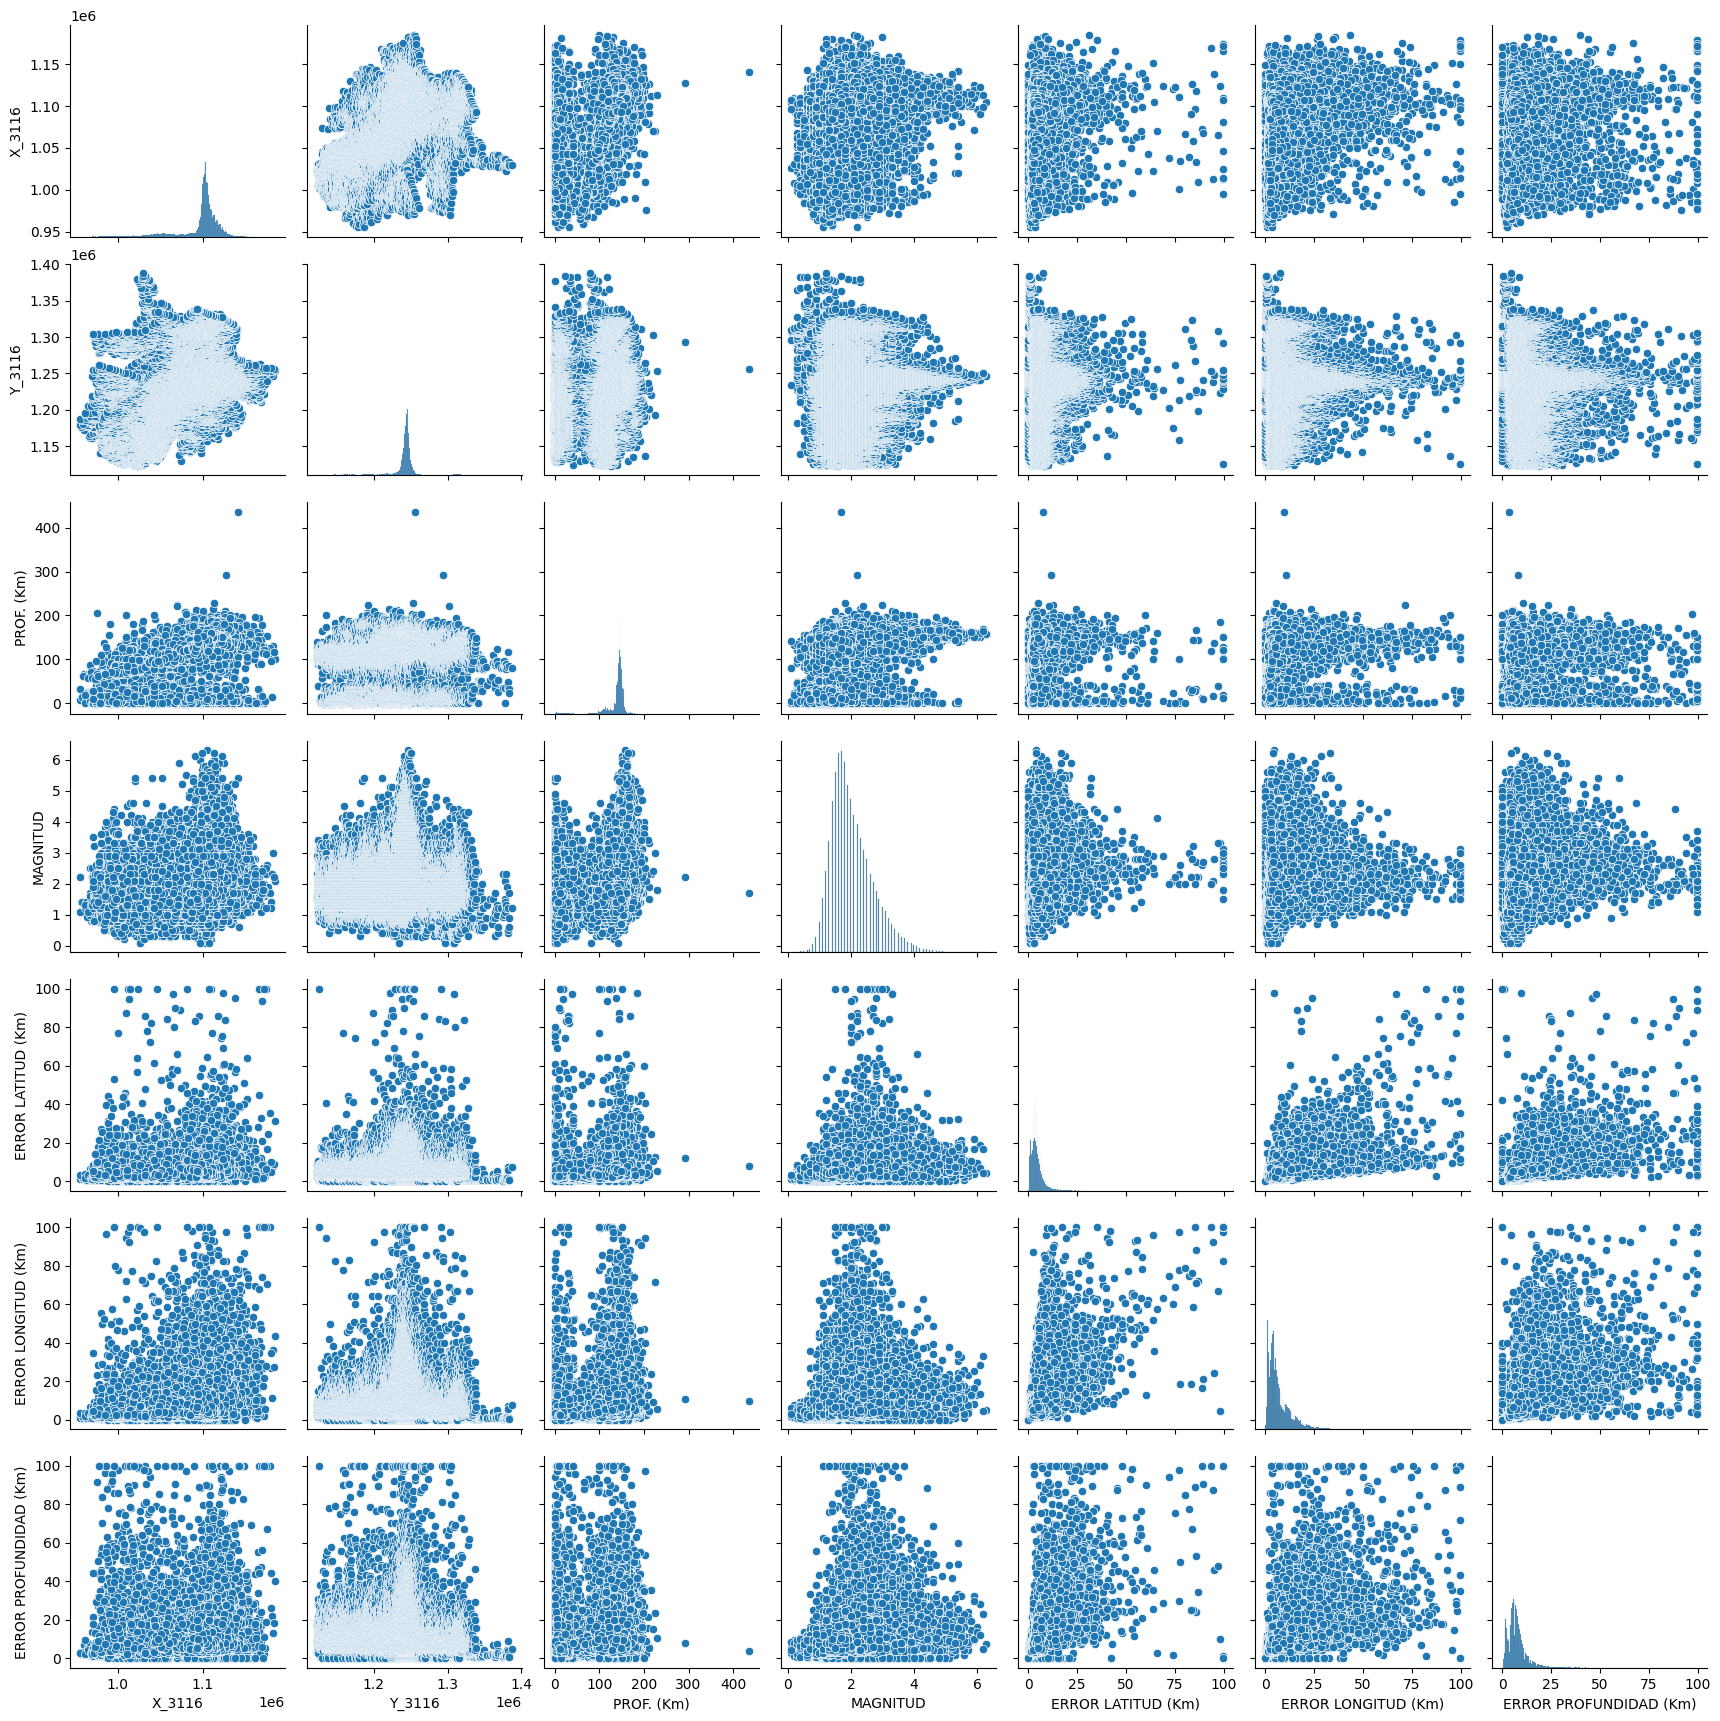

In [72]:
plt.figure(figsize=(10,10))
sns.pairplot(df_interes)
plt.show()

En este Notebook, se han presentado algunos pasos esenciales para llevar a cabo un Análisis Exploratorio de Datos (EDA). La extensión de este proceso puede variar según las necesidades y objetivos específicos del proyecto. Es crucial tener presente los objetivos para guiar el análisis de manera estructurada.

Aun así, se podrían considerar las siguientes acciones adicionales:

1. **Visualizaciones Adicionales:** Realizar diferentes tipos de gráficos y visualizaciones para obtener una comprensión más profunda de los patrones y relaciones en los datos. Puedes utilizar herramientas como diagramas de dispersión, gráficos de barras, diagramas de violín, entre otros.

2. **Análisis Geoespacial:** Si los datos contienen información geoespacial (coordenadas), se podría realizar un análisis geoespacial junto con la visualización de la distribución de los eventos/datos en mapas.

3. **Segmentación de Datos:** Agrupa los datos en segmentos/grupos relevantes para analizar comportamientos específicos. Esto podría revelar patrones ocultos en subconjuntos de datos, útil cuando se tienen variables categóricas, o al discretizar una variable de interés en subgrupos.

4. **Pruebas Estadísticas:** Aplica pruebas estadísticas para validar hipótesis o identificar correlaciones significativas entre variables.

5. **Feature Engineering:** Crea nuevas variables (nuevas columnas) derivadas de las existentes para mejorar la capacidad predictiva de un modelo o descubrir nuevas perspectivas en los datos. Entre esos cálculos estarían posibles trasformaciones que faciliten la utilización de un algoritmo.

6. **Manejo de Outliers:** Realiza un análisis más detallado de los valores atípicos para comprender su impacto en el conjunto de datos y decidir si deben ser tratados de manera especial.

Recuerda que el Análisis Exploratorio de Datos es un proceso iterativo, por lo que a cada subconjunto de datos creado se puede proceder con el EDA. Siempre mantén la flexibilidad para adaptarte y ajustar tus enfoques a medida que descubres más sobre los datos.
Ser curioso por los datos es un paso para obtener productos de calidad.


# Fin